In [41]:
import numpy as np
from tensorflow.keras.models import Model, load_model
import tensorflow.keras.backend as K
from scipy.stats import pearsonr, spearmanr
import sys, os
sys.path.append('../python_scripts/')
import analysis, datasets, baseline
sys.path.append('../imported_code/svcca/')
import cca_core, pwcca
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

from sklearn.manifold import MDS


# Stolen cordially from http://chris35wills.github.io/matplotlib_diverging_colorbar/
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
'''
Plot Helpers
'''

'''
Visualize RSA
'''
def plot_triple_color(weights, shuffle, both):
    # Establish bounds for shared colorbar
    vmin = min(np.amin(weights), np.amin(shuffle), np.amin(both))
    vmax = max(np.amax(weights), np.amax(shuffle), np.amax(both))
    midpoint = vmin + vmax / 2 # Satisfy function
    norm = MidpointNormalize(midpoint=midpoint,vmin=vmin, vmax=vmax)
    # Create graphs
    cf, (cax1, cax2, cax3) = plt.subplots(1, 3)
    cf.suptitle('Correlation Graphs', fontsize=24)
    cf.set_size_inches((20, 5.5))
    _  = color_plot_helper('Weights', weights, cax1, norm=norm)
    _  = color_plot_helper('Shuffle', shuffle, cax2, norm=norm)
    im = color_plot_helper('Both', both, cax3, norm=norm)
    # Create shared colorbar
    divider = make_axes_locatable(cax3)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(im, cax=cax)

def plot_triple_diff(weights, shuffle, both):
    # Create variables for readability
    bw = both - weights
    bs = both - shuffle
    ws = weights - shuffle
    # Establish bounds for shared colorbar (midpoint always 0, keep symmetric)
    _min = min(np.amin(bw), np.amin(bs), np.amin(ws))
    _max = max(np.amax(bw), np.amax(bs), np.amax(ws))
    bound = max(abs(_max), abs(_min))
    norm = MidpointNormalize(midpoint=0,vmin=-bound, vmax=bound)
    # Create graphs
    df, (dax1, dax2, dax3) = plt.subplots(1, 3)
    df.suptitle('Difference Graphs', fontsize=24)
    df.set_size_inches((20, 5.5))
    _  = color_plot_helper('Difference: Both - Weights', bw, dax1, norm=norm, color='seismic')
    _  = color_plot_helper('Difference: Both - Shuffle', bs, dax2, norm=norm, color='seismic')
    im = color_plot_helper('Difference: Weights - Shuffle', ws, dax3, norm=norm, color='seismic')
    # Create shared colorbar
    divider = make_axes_locatable(dax3)
    dax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(im, cax=dax)

def plot_triple_mds(weights, shuffle, both):
    mf, (max1, max2, max3) = plt.subplots(1, 3)
    mf.suptitle('MDS', fontsize=24)
    mf.set_size_inches((20, 5.5))
    mds_plot_helper('Weights', weights, max1)
    mds_plot_helper('Shuffle', shuffle, max2)
    mds_plot_helper('Both', both, max3)


def color_plot_helper(title: str, corr_distance, axis, norm=None, color=None):
    axis.set_title(title, fontsize=16)
    axis.set_xlabel('layer')
    axis.set_xticks(ticks=[5, 15, 25, 35, 45, 55, 65, 75, 85])
    axis.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9])
    axis.set_yticks(ticks=[5, 15, 25, 35, 45, 55, 65, 75, 85])
    axis.set_yticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9])
    axis.set_ylabel('layer')
    cmap = plt.get_cmap(color)
    im = axis.imshow(corr_distance, origin='upper', cmap=cmap, norm=norm)
    return im

def mds_plot_helper(title: str, corr_distance, axis):
    embedding = MDS(n_components=2, dissimilarity='precomputed')
    X_transformed = embedding.fit_transform(corr_distance)
    
    axis.set_title(title, fontsize=16)
    colors = ['#f5f59d', '#f5b642', '#f58742', '#f55442', '#c940c5',
              '#b407ed', '#7d09d6', '#50017a', '#000000']
    for i in range(10):
        axis.set(adjustable='box', aspect='equal')
        axis.plot(X_transformed[i::10, 0], X_transformed[i::10, 1], linestyle='-', color='black', zorder=1)
        axis.scatter(X_transformed[i::10, 0], X_transformed[i::10, 1], marker='o', color=colors, zorder=2)

In [2]:
'''
Load Data
'''
_, testData = datasets.make_train_data(None)
x_predict, _ = datasets.make_predict_data(testData)

Making train data...
GCN...
ZCA...
Done!
Making test data...
Done!


In [4]:
'''
Calculate RSA
'''
rsa_weights = 1 - analysis.correlate('RSA', '../outputs/models/primary/', x_predict)
rsa_shuffle = 1 - analysis.correlate('RSA', '../outputs/models/shuffle_seed/', x_predict)
rsa_both = 1 - analysis.correlate('RSA', '../outputs/models/both/', x_predict)

**** Load and Preprocess Acts ****
*** Working on w211s311.h5 ***
Layer 0
Getting activations...
Layer 1
Getting activations...
Layer 2
Getting activations...
Layer 3
Getting activations...
Layer 4
Getting activations...
Layer 5
Getting activations...
Layer 6
Getting activations...
Layer 7
Getting activations...
Layer 8
Getting activations...
* Preprocessing...
shape: (1000, 98304)
num_images = 1000
* Preprocessing...
shape: (1000, 98304)
num_images = 1000
* Preprocessing...
shape: (1000, 24576)
num_images = 1000
* Preprocessing...
shape: (1000, 49152)
num_images = 1000
* Preprocessing...
shape: (1000, 49152)
num_images = 1000
* Preprocessing...
shape: (1000, 12288)
num_images = 1000
* Preprocessing...
shape: (1000, 6912)
num_images = 1000
* Preprocessing...
shape: (1000, 6912)
num_images = 1000
* Preprocessing...
shape: (1000, 360)
num_images = 1000
*** Working on w202s302.h5 ***
Layer 0
Getting activations...
Layer 1
Getting activations...
Layer 2
Getting activations...
Layer 3
Getti

* Preprocessing...
shape: (1000, 6912)
num_images = 1000
* Preprocessing...
shape: (1000, 360)
num_images = 1000
**** Done gathering RDMs, now correlations ****
Correlation 0 , 0
Correlation 1 , 0
Correlation 1 , 1
Correlation 2 , 0
Correlation 2 , 1
Correlation 2 , 2
Correlation 3 , 0
Correlation 3 , 1
Correlation 3 , 2
Correlation 3 , 3
Correlation 4 , 0
Correlation 4 , 1
Correlation 4 , 2
Correlation 4 , 3
Correlation 4 , 4
Correlation 5 , 0
Correlation 5 , 1
Correlation 5 , 2
Correlation 5 , 3
Correlation 5 , 4
Correlation 5 , 5
Correlation 6 , 0
Correlation 6 , 1
Correlation 6 , 2
Correlation 6 , 3
Correlation 6 , 4
Correlation 6 , 5
Correlation 6 , 6
Correlation 7 , 0
Correlation 7 , 1
Correlation 7 , 2
Correlation 7 , 3
Correlation 7 , 4
Correlation 7 , 5
Correlation 7 , 6
Correlation 7 , 7
Correlation 8 , 0
Correlation 8 , 1
Correlation 8 , 2
Correlation 8 , 3
Correlation 8 , 4
Correlation 8 , 5
Correlation 8 , 6
Correlation 8 , 7
Correlation 8 , 8
Correlation 9 , 0
Correlation

Correlation 28 , 13
Correlation 28 , 14
Correlation 28 , 15
Correlation 28 , 16
Correlation 28 , 17
Correlation 28 , 18
Correlation 28 , 19
Correlation 28 , 20
Correlation 28 , 21
Correlation 28 , 22
Correlation 28 , 23
Correlation 28 , 24
Correlation 28 , 25
Correlation 28 , 26
Correlation 28 , 27
Correlation 28 , 28
Correlation 29 , 0
Correlation 29 , 1
Correlation 29 , 2
Correlation 29 , 3
Correlation 29 , 4
Correlation 29 , 5
Correlation 29 , 6
Correlation 29 , 7
Correlation 29 , 8
Correlation 29 , 9
Correlation 29 , 10
Correlation 29 , 11
Correlation 29 , 12
Correlation 29 , 13
Correlation 29 , 14
Correlation 29 , 15
Correlation 29 , 16
Correlation 29 , 17
Correlation 29 , 18
Correlation 29 , 19
Correlation 29 , 20
Correlation 29 , 21
Correlation 29 , 22
Correlation 29 , 23
Correlation 29 , 24
Correlation 29 , 25
Correlation 29 , 26
Correlation 29 , 27
Correlation 29 , 28
Correlation 29 , 29
Correlation 30 , 0
Correlation 30 , 1
Correlation 30 , 2
Correlation 30 , 3
Correlation 30

Correlation 40 , 19
Correlation 40 , 20
Correlation 40 , 21
Correlation 40 , 22
Correlation 40 , 23
Correlation 40 , 24
Correlation 40 , 25
Correlation 40 , 26
Correlation 40 , 27
Correlation 40 , 28
Correlation 40 , 29
Correlation 40 , 30
Correlation 40 , 31
Correlation 40 , 32
Correlation 40 , 33
Correlation 40 , 34
Correlation 40 , 35
Correlation 40 , 36
Correlation 40 , 37
Correlation 40 , 38
Correlation 40 , 39
Correlation 40 , 40
Correlation 41 , 0
Correlation 41 , 1
Correlation 41 , 2
Correlation 41 , 3
Correlation 41 , 4
Correlation 41 , 5
Correlation 41 , 6
Correlation 41 , 7
Correlation 41 , 8
Correlation 41 , 9
Correlation 41 , 10
Correlation 41 , 11
Correlation 41 , 12
Correlation 41 , 13
Correlation 41 , 14
Correlation 41 , 15
Correlation 41 , 16
Correlation 41 , 17
Correlation 41 , 18
Correlation 41 , 19
Correlation 41 , 20
Correlation 41 , 21
Correlation 41 , 22
Correlation 41 , 23
Correlation 41 , 24
Correlation 41 , 25
Correlation 41 , 26
Correlation 41 , 27
Correlatio

Correlation 49 , 31
Correlation 49 , 32
Correlation 49 , 33
Correlation 49 , 34
Correlation 49 , 35
Correlation 49 , 36
Correlation 49 , 37
Correlation 49 , 38
Correlation 49 , 39
Correlation 49 , 40
Correlation 49 , 41
Correlation 49 , 42
Correlation 49 , 43
Correlation 49 , 44
Correlation 49 , 45
Correlation 49 , 46
Correlation 49 , 47
Correlation 49 , 48
Correlation 49 , 49
Correlation 50 , 0
Correlation 50 , 1
Correlation 50 , 2
Correlation 50 , 3
Correlation 50 , 4
Correlation 50 , 5
Correlation 50 , 6
Correlation 50 , 7
Correlation 50 , 8
Correlation 50 , 9
Correlation 50 , 10
Correlation 50 , 11
Correlation 50 , 12
Correlation 50 , 13
Correlation 50 , 14
Correlation 50 , 15
Correlation 50 , 16
Correlation 50 , 17
Correlation 50 , 18
Correlation 50 , 19
Correlation 50 , 20
Correlation 50 , 21
Correlation 50 , 22
Correlation 50 , 23
Correlation 50 , 24
Correlation 50 , 25
Correlation 50 , 26
Correlation 50 , 27
Correlation 50 , 28
Correlation 50 , 29
Correlation 50 , 30
Correlatio

Correlation 57 , 21
Correlation 57 , 22
Correlation 57 , 23
Correlation 57 , 24
Correlation 57 , 25
Correlation 57 , 26
Correlation 57 , 27
Correlation 57 , 28
Correlation 57 , 29
Correlation 57 , 30
Correlation 57 , 31
Correlation 57 , 32
Correlation 57 , 33
Correlation 57 , 34
Correlation 57 , 35
Correlation 57 , 36
Correlation 57 , 37
Correlation 57 , 38
Correlation 57 , 39
Correlation 57 , 40
Correlation 57 , 41
Correlation 57 , 42
Correlation 57 , 43
Correlation 57 , 44
Correlation 57 , 45
Correlation 57 , 46
Correlation 57 , 47
Correlation 57 , 48
Correlation 57 , 49
Correlation 57 , 50
Correlation 57 , 51
Correlation 57 , 52
Correlation 57 , 53
Correlation 57 , 54
Correlation 57 , 55
Correlation 57 , 56
Correlation 57 , 57
Correlation 58 , 0
Correlation 58 , 1
Correlation 58 , 2
Correlation 58 , 3
Correlation 58 , 4
Correlation 58 , 5
Correlation 58 , 6
Correlation 58 , 7
Correlation 58 , 8
Correlation 58 , 9
Correlation 58 , 10
Correlation 58 , 11
Correlation 58 , 12
Correlatio

Correlation 64 , 7
Correlation 64 , 8
Correlation 64 , 9
Correlation 64 , 10
Correlation 64 , 11
Correlation 64 , 12
Correlation 64 , 13
Correlation 64 , 14
Correlation 64 , 15
Correlation 64 , 16
Correlation 64 , 17
Correlation 64 , 18
Correlation 64 , 19
Correlation 64 , 20
Correlation 64 , 21
Correlation 64 , 22
Correlation 64 , 23
Correlation 64 , 24
Correlation 64 , 25
Correlation 64 , 26
Correlation 64 , 27
Correlation 64 , 28
Correlation 64 , 29
Correlation 64 , 30
Correlation 64 , 31
Correlation 64 , 32
Correlation 64 , 33
Correlation 64 , 34
Correlation 64 , 35
Correlation 64 , 36
Correlation 64 , 37
Correlation 64 , 38
Correlation 64 , 39
Correlation 64 , 40
Correlation 64 , 41
Correlation 64 , 42
Correlation 64 , 43
Correlation 64 , 44
Correlation 64 , 45
Correlation 64 , 46
Correlation 64 , 47
Correlation 64 , 48
Correlation 64 , 49
Correlation 64 , 50
Correlation 64 , 51
Correlation 64 , 52
Correlation 64 , 53
Correlation 64 , 54
Correlation 64 , 55
Correlation 64 , 56
Cor

Correlation 70 , 16
Correlation 70 , 17
Correlation 70 , 18
Correlation 70 , 19
Correlation 70 , 20
Correlation 70 , 21
Correlation 70 , 22
Correlation 70 , 23
Correlation 70 , 24
Correlation 70 , 25
Correlation 70 , 26
Correlation 70 , 27
Correlation 70 , 28
Correlation 70 , 29
Correlation 70 , 30
Correlation 70 , 31
Correlation 70 , 32
Correlation 70 , 33
Correlation 70 , 34
Correlation 70 , 35
Correlation 70 , 36
Correlation 70 , 37
Correlation 70 , 38
Correlation 70 , 39
Correlation 70 , 40
Correlation 70 , 41
Correlation 70 , 42
Correlation 70 , 43
Correlation 70 , 44
Correlation 70 , 45
Correlation 70 , 46
Correlation 70 , 47
Correlation 70 , 48
Correlation 70 , 49
Correlation 70 , 50
Correlation 70 , 51
Correlation 70 , 52
Correlation 70 , 53
Correlation 70 , 54
Correlation 70 , 55
Correlation 70 , 56
Correlation 70 , 57
Correlation 70 , 58
Correlation 70 , 59
Correlation 70 , 60
Correlation 70 , 61
Correlation 70 , 62
Correlation 70 , 63
Correlation 70 , 64
Correlation 70 , 65


Correlation 75 , 67
Correlation 75 , 68
Correlation 75 , 69
Correlation 75 , 70
Correlation 75 , 71
Correlation 75 , 72
Correlation 75 , 73
Correlation 75 , 74
Correlation 75 , 75
Correlation 76 , 0
Correlation 76 , 1
Correlation 76 , 2
Correlation 76 , 3
Correlation 76 , 4
Correlation 76 , 5
Correlation 76 , 6
Correlation 76 , 7
Correlation 76 , 8
Correlation 76 , 9
Correlation 76 , 10
Correlation 76 , 11
Correlation 76 , 12
Correlation 76 , 13
Correlation 76 , 14
Correlation 76 , 15
Correlation 76 , 16
Correlation 76 , 17
Correlation 76 , 18
Correlation 76 , 19
Correlation 76 , 20
Correlation 76 , 21
Correlation 76 , 22
Correlation 76 , 23
Correlation 76 , 24
Correlation 76 , 25
Correlation 76 , 26
Correlation 76 , 27
Correlation 76 , 28
Correlation 76 , 29
Correlation 76 , 30
Correlation 76 , 31
Correlation 76 , 32
Correlation 76 , 33
Correlation 76 , 34
Correlation 76 , 35
Correlation 76 , 36
Correlation 76 , 37
Correlation 76 , 38
Correlation 76 , 39
Correlation 76 , 40
Correlatio

Correlation 81 , 10
Correlation 81 , 11
Correlation 81 , 12
Correlation 81 , 13
Correlation 81 , 14
Correlation 81 , 15
Correlation 81 , 16
Correlation 81 , 17
Correlation 81 , 18
Correlation 81 , 19
Correlation 81 , 20
Correlation 81 , 21
Correlation 81 , 22
Correlation 81 , 23
Correlation 81 , 24
Correlation 81 , 25
Correlation 81 , 26
Correlation 81 , 27
Correlation 81 , 28
Correlation 81 , 29
Correlation 81 , 30
Correlation 81 , 31
Correlation 81 , 32
Correlation 81 , 33
Correlation 81 , 34
Correlation 81 , 35
Correlation 81 , 36
Correlation 81 , 37
Correlation 81 , 38
Correlation 81 , 39
Correlation 81 , 40
Correlation 81 , 41
Correlation 81 , 42
Correlation 81 , 43
Correlation 81 , 44
Correlation 81 , 45
Correlation 81 , 46
Correlation 81 , 47
Correlation 81 , 48
Correlation 81 , 49
Correlation 81 , 50
Correlation 81 , 51
Correlation 81 , 52
Correlation 81 , 53
Correlation 81 , 54
Correlation 81 , 55
Correlation 81 , 56
Correlation 81 , 57
Correlation 81 , 58
Correlation 81 , 59


Correlation 86 , 5
Correlation 86 , 6
Correlation 86 , 7
Correlation 86 , 8
Correlation 86 , 9
Correlation 86 , 10
Correlation 86 , 11
Correlation 86 , 12
Correlation 86 , 13
Correlation 86 , 14
Correlation 86 , 15
Correlation 86 , 16
Correlation 86 , 17
Correlation 86 , 18
Correlation 86 , 19
Correlation 86 , 20
Correlation 86 , 21
Correlation 86 , 22
Correlation 86 , 23
Correlation 86 , 24
Correlation 86 , 25
Correlation 86 , 26
Correlation 86 , 27
Correlation 86 , 28
Correlation 86 , 29
Correlation 86 , 30
Correlation 86 , 31
Correlation 86 , 32
Correlation 86 , 33
Correlation 86 , 34
Correlation 86 , 35
Correlation 86 , 36
Correlation 86 , 37
Correlation 86 , 38
Correlation 86 , 39
Correlation 86 , 40
Correlation 86 , 41
Correlation 86 , 42
Correlation 86 , 43
Correlation 86 , 44
Correlation 86 , 45
Correlation 86 , 46
Correlation 86 , 47
Correlation 86 , 48
Correlation 86 , 49
Correlation 86 , 50
Correlation 86 , 51
Correlation 86 , 52
Correlation 86 , 53
Correlation 86 , 54
Corre

In [5]:
'''
Calculate SVCCA
'''
svcca_weights = 1 - analysis.correlate('SVCCA', '../outputs/models/primary/', x_predict)
svcca_shuffle = 1 - analysis.correlate('SVCCA', '../outputs/models/shuffle_seed/', x_predict)
svcca_both = 1 - analysis.correlate('SVCCA', '../outputs/models/both/', x_predict)

**** Load and Preprocess Acts ****
*** Working on w211s311.h5 ***
Layer 0
Getting activations...
Layer 1
Getting activations...
Layer 2
Getting activations...
Layer 3
Getting activations...
Layer 4
Getting activations...
Layer 5
Getting activations...
Layer 6
Getting activations...
Layer 7
Getting activations...
Layer 8
Getting activations...
* Preprocessing...
Found 88 / 96 neurons accounts for 0.9911729 of variance
* Preprocessing...
Found 85 / 96 neurons accounts for 0.9901466 of variance
* Preprocessing...
Found 87 / 96 neurons accounts for 0.99076813 of variance
* Preprocessing...
Found 177 / 192 neurons accounts for 0.9902784 of variance
* Preprocessing...
Found 181 / 192 neurons accounts for 0.99044424 of variance
* Preprocessing...
Found 184 / 192 neurons accounts for 0.99030465 of variance
* Preprocessing...
Found 184 / 192 neurons accounts for 0.9901178 of variance
* Preprocessing...
Found 184 / 192 neurons accounts for 0.9904014 of variance
* Preprocessing...
Found 10 / 10 n

Layer 4
Getting activations...
Layer 5
Getting activations...
Layer 6
Getting activations...
Layer 7
Getting activations...
Layer 8
Getting activations...
* Preprocessing...
Found 87 / 96 neurons accounts for 0.9901616 of variance
* Preprocessing...
Found 85 / 96 neurons accounts for 0.9909328 of variance
* Preprocessing...
Found 84 / 96 neurons accounts for 0.9905798 of variance
* Preprocessing...
Found 178 / 192 neurons accounts for 0.99036855 of variance
* Preprocessing...
Found 183 / 192 neurons accounts for 0.9906852 of variance
* Preprocessing...
Found 185 / 192 neurons accounts for 0.9902881 of variance
* Preprocessing...
Found 185 / 192 neurons accounts for 0.99050695 of variance
* Preprocessing...
Found 184 / 192 neurons accounts for 0.99046755 of variance
* Preprocessing...
Found 10 / 10 neurons accounts for 1.0 of variance
*** Working on w205s305.h5 ***
Layer 0
Getting activations...
Layer 1
Getting activations...
Layer 2
Getting activations...
Layer 3
Getting activations...

Correlation 25 , 7
Correlation 25 , 8
Correlation 25 , 9
Correlation 25 , 10
Correlation 25 , 11
Correlation 25 , 12
Correlation 25 , 13
Correlation 25 , 14
Correlation 25 , 15
Correlation 25 , 16
Correlation 25 , 17
Correlation 25 , 18
Correlation 25 , 19
Correlation 25 , 20
Correlation 25 , 21
Correlation 25 , 22
Correlation 25 , 23
Correlation 25 , 24
Correlation 25 , 25
Correlation 26 , 0
Correlation 26 , 1
Correlation 26 , 2
Correlation 26 , 3
Correlation 26 , 4
Correlation 26 , 5
Correlation 26 , 6
Correlation 26 , 7
Correlation 26 , 8
Correlation 26 , 9
Correlation 26 , 10
Correlation 26 , 11
Correlation 26 , 12
Correlation 26 , 13
Correlation 26 , 14
Correlation 26 , 15
Correlation 26 , 16
Correlation 26 , 17
Correlation 26 , 18
Correlation 26 , 19
Correlation 26 , 20
Correlation 26 , 21
Correlation 26 , 22
Correlation 26 , 23
Correlation 26 , 24
Correlation 26 , 25
Correlation 26 , 26
Correlation 27 , 0
Correlation 27 , 1
Correlation 27 , 2
Correlation 27 , 3
Correlation 27 , 

Correlation 38 , 10
Correlation 38 , 11
Correlation 38 , 12
Correlation 38 , 13
Correlation 38 , 14
Correlation 38 , 15
Correlation 38 , 16
Correlation 38 , 17
Correlation 38 , 18
Correlation 38 , 19
Correlation 38 , 20
Correlation 38 , 21
Correlation 38 , 22
Correlation 38 , 23
Correlation 38 , 24
Correlation 38 , 25
Correlation 38 , 26
Correlation 38 , 27
Correlation 38 , 28
Correlation 38 , 29
Correlation 38 , 30
Correlation 38 , 31
Correlation 38 , 32
Correlation 38 , 33
Correlation 38 , 34
Correlation 38 , 35
Correlation 38 , 36
Correlation 38 , 37
Correlation 38 , 38
Correlation 39 , 0
Correlation 39 , 1
Correlation 39 , 2
Correlation 39 , 3
Correlation 39 , 4
Correlation 39 , 5
Correlation 39 , 6
Correlation 39 , 7
Correlation 39 , 8
Correlation 39 , 9
Correlation 39 , 10
Correlation 39 , 11
Correlation 39 , 12
Correlation 39 , 13
Correlation 39 , 14
Correlation 39 , 15
Correlation 39 , 16
Correlation 39 , 17
Correlation 39 , 18
Correlation 39 , 19
Correlation 39 , 20
Correlatio

Correlation 47 , 38
Correlation 47 , 39
Correlation 47 , 40
Correlation 47 , 41
Correlation 47 , 42
Correlation 47 , 43
Correlation 47 , 44
Correlation 47 , 45
Correlation 47 , 46
Correlation 47 , 47
Correlation 48 , 0
Correlation 48 , 1
Correlation 48 , 2
Correlation 48 , 3
Correlation 48 , 4
Correlation 48 , 5
Correlation 48 , 6
Correlation 48 , 7
Correlation 48 , 8
Correlation 48 , 9
Correlation 48 , 10
Correlation 48 , 11
Correlation 48 , 12
Correlation 48 , 13
Correlation 48 , 14
Correlation 48 , 15
Correlation 48 , 16
Correlation 48 , 17
Correlation 48 , 18
Correlation 48 , 19
Correlation 48 , 20
Correlation 48 , 21
Correlation 48 , 22
Correlation 48 , 23
Correlation 48 , 24
Correlation 48 , 25
Correlation 48 , 26
Correlation 48 , 27
Correlation 48 , 28
Correlation 48 , 29
Correlation 48 , 30
Correlation 48 , 31
Correlation 48 , 32
Correlation 48 , 33
Correlation 48 , 34
Correlation 48 , 35
Correlation 48 , 36
Correlation 48 , 37
Correlation 48 , 38
Correlation 48 , 39
Correlatio

Correlation 55 , 40
Correlation 55 , 41
Correlation 55 , 42
Correlation 55 , 43
Correlation 55 , 44
Correlation 55 , 45
Correlation 55 , 46
Correlation 55 , 47
Correlation 55 , 48
Correlation 55 , 49
Correlation 55 , 50
Correlation 55 , 51
Correlation 55 , 52
Correlation 55 , 53
Correlation 55 , 54
Correlation 55 , 55
Correlation 56 , 0
Correlation 56 , 1
Correlation 56 , 2
Correlation 56 , 3
Correlation 56 , 4
Correlation 56 , 5
Correlation 56 , 6
Correlation 56 , 7
Correlation 56 , 8
Correlation 56 , 9
Correlation 56 , 10
Correlation 56 , 11
Correlation 56 , 12
Correlation 56 , 13
Correlation 56 , 14
Correlation 56 , 15
Correlation 56 , 16
Correlation 56 , 17
Correlation 56 , 18
Correlation 56 , 19
Correlation 56 , 20
Correlation 56 , 21
Correlation 56 , 22
Correlation 56 , 23
Correlation 56 , 24
Correlation 56 , 25
Correlation 56 , 26
Correlation 56 , 27
Correlation 56 , 28
Correlation 56 , 29
Correlation 56 , 30
Correlation 56 , 31
Correlation 56 , 32
Correlation 56 , 33
Correlatio

Correlation 62 , 41
Correlation 62 , 42
Correlation 62 , 43
Correlation 62 , 44
Correlation 62 , 45
Correlation 62 , 46
Correlation 62 , 47
Correlation 62 , 48
Correlation 62 , 49
Correlation 62 , 50
Correlation 62 , 51
Correlation 62 , 52
Correlation 62 , 53
Correlation 62 , 54
Correlation 62 , 55
Correlation 62 , 56
Correlation 62 , 57
Correlation 62 , 58
Correlation 62 , 59
Correlation 62 , 60
Correlation 62 , 61
Correlation 62 , 62
Correlation 63 , 0
Correlation 63 , 1
Correlation 63 , 2
Correlation 63 , 3
Correlation 63 , 4
Correlation 63 , 5
Correlation 63 , 6
Correlation 63 , 7
Correlation 63 , 8
Correlation 63 , 9
Correlation 63 , 10
Correlation 63 , 11
Correlation 63 , 12
Correlation 63 , 13
Correlation 63 , 14
Correlation 63 , 15
Correlation 63 , 16
Correlation 63 , 17
Correlation 63 , 18
Correlation 63 , 19
Correlation 63 , 20
Correlation 63 , 21
Correlation 63 , 22
Correlation 63 , 23
Correlation 63 , 24
Correlation 63 , 25
Correlation 63 , 26
Correlation 63 , 27
Correlatio

Correlation 68 , 61
Correlation 68 , 62
Correlation 68 , 63
Correlation 68 , 64
Correlation 68 , 65
Correlation 68 , 66
Correlation 68 , 67
Correlation 68 , 68
Correlation 69 , 0
Correlation 69 , 1
Correlation 69 , 2
Correlation 69 , 3
Correlation 69 , 4
Correlation 69 , 5
Correlation 69 , 6
Correlation 69 , 7
Correlation 69 , 8
Correlation 69 , 9
Correlation 69 , 10
Correlation 69 , 11
Correlation 69 , 12
Correlation 69 , 13
Correlation 69 , 14
Correlation 69 , 15
Correlation 69 , 16
Correlation 69 , 17
Correlation 69 , 18
Correlation 69 , 19
Correlation 69 , 20
Correlation 69 , 21
Correlation 69 , 22
Correlation 69 , 23
Correlation 69 , 24
Correlation 69 , 25
Correlation 69 , 26
Correlation 69 , 27
Correlation 69 , 28
Correlation 69 , 29
Correlation 69 , 30
Correlation 69 , 31
Correlation 69 , 32
Correlation 69 , 33
Correlation 69 , 34
Correlation 69 , 35
Correlation 69 , 36
Correlation 69 , 37
Correlation 69 , 38
Correlation 69 , 39
Correlation 69 , 40
Correlation 69 , 41
Correlatio

Correlation 74 , 45
Correlation 74 , 46
Correlation 74 , 47
Correlation 74 , 48
Correlation 74 , 49
Correlation 74 , 50
Correlation 74 , 51
Correlation 74 , 52
Correlation 74 , 53
Correlation 74 , 54
Correlation 74 , 55
Correlation 74 , 56
Correlation 74 , 57
Correlation 74 , 58
Correlation 74 , 59
Correlation 74 , 60
Correlation 74 , 61
Correlation 74 , 62
Correlation 74 , 63
Correlation 74 , 64
Correlation 74 , 65
Correlation 74 , 66
Correlation 74 , 67
Correlation 74 , 68
Correlation 74 , 69
Correlation 74 , 70
Correlation 74 , 71
Correlation 74 , 72
Correlation 74 , 73
Correlation 74 , 74
Correlation 75 , 0
Correlation 75 , 1
Correlation 75 , 2
Correlation 75 , 3
Correlation 75 , 4
Correlation 75 , 5
Correlation 75 , 6
Correlation 75 , 7
Correlation 75 , 8
Correlation 75 , 9
Correlation 75 , 10
Correlation 75 , 11
Correlation 75 , 12
Correlation 75 , 13
Correlation 75 , 14
Correlation 75 , 15
Correlation 75 , 16
Correlation 75 , 17
Correlation 75 , 18
Correlation 75 , 19
Correlatio

Correlation 79 , 73
Correlation 79 , 74
Correlation 79 , 75
Correlation 79 , 76
Correlation 79 , 77
Correlation 79 , 78
Correlation 79 , 79
Correlation 80 , 0
Correlation 80 , 1
Correlation 80 , 2
Correlation 80 , 3
Correlation 80 , 4
Correlation 80 , 5
Correlation 80 , 6
Correlation 80 , 7
Correlation 80 , 8
Correlation 80 , 9
Correlation 80 , 10
Correlation 80 , 11
Correlation 80 , 12
Correlation 80 , 13
Correlation 80 , 14
Correlation 80 , 15
Correlation 80 , 16
Correlation 80 , 17
Correlation 80 , 18
Correlation 80 , 19
Correlation 80 , 20
Correlation 80 , 21
Correlation 80 , 22
Correlation 80 , 23
Correlation 80 , 24
Correlation 80 , 25
Correlation 80 , 26
Correlation 80 , 27
Correlation 80 , 28
Correlation 80 , 29
Correlation 80 , 30
Correlation 80 , 31
Correlation 80 , 32
Correlation 80 , 33
Correlation 80 , 34
Correlation 80 , 35
Correlation 80 , 36
Correlation 80 , 37
Correlation 80 , 38
Correlation 80 , 39
Correlation 80 , 40
Correlation 80 , 41
Correlation 80 , 42
Correlatio

Correlation 84 , 76
Correlation 84 , 77
Correlation 84 , 78
Correlation 84 , 79
Correlation 84 , 80
Correlation 84 , 81
Correlation 84 , 82
Correlation 84 , 83
Correlation 84 , 84
Correlation 85 , 0
Correlation 85 , 1
Correlation 85 , 2
Correlation 85 , 3
Correlation 85 , 4
Correlation 85 , 5
Correlation 85 , 6
Correlation 85 , 7
Correlation 85 , 8
Correlation 85 , 9
Correlation 85 , 10
Correlation 85 , 11
Correlation 85 , 12
Correlation 85 , 13
Correlation 85 , 14
Correlation 85 , 15
Correlation 85 , 16
Correlation 85 , 17
Correlation 85 , 18
Correlation 85 , 19
Correlation 85 , 20
Correlation 85 , 21
Correlation 85 , 22
Correlation 85 , 23
Correlation 85 , 24
Correlation 85 , 25
Correlation 85 , 26
Correlation 85 , 27
Correlation 85 , 28
Correlation 85 , 29
Correlation 85 , 30
Correlation 85 , 31
Correlation 85 , 32
Correlation 85 , 33
Correlation 85 , 34
Correlation 85 , 35
Correlation 85 , 36
Correlation 85 , 37
Correlation 85 , 38
Correlation 85 , 39
Correlation 85 , 40
Correlatio

Correlation 89 , 57
Correlation 89 , 58
Correlation 89 , 59
Correlation 89 , 60
Correlation 89 , 61
Correlation 89 , 62
Correlation 89 , 63
Correlation 89 , 64
Correlation 89 , 65
Correlation 89 , 66
Correlation 89 , 67
Correlation 89 , 68
Correlation 89 , 69
Correlation 89 , 70
Correlation 89 , 71
Correlation 89 , 72
Correlation 89 , 73
Correlation 89 , 74
Correlation 89 , 75
Correlation 89 , 76
Correlation 89 , 77
Correlation 89 , 78
Correlation 89 , 79
Correlation 89 , 80
Correlation 89 , 81
Correlation 89 , 82
Correlation 89 , 83
Correlation 89 , 84
Correlation 89 , 85
Correlation 89 , 86
Correlation 89 , 87
Correlation 89 , 88
Correlation 89 , 89
Done!


In [6]:
'''
Calculate PWCCA
'''
pwcca_weights = 1 - analysis.correlate('PWCCA', '../outputs/models/primary/', x_predict)
pwcca_shuffle = 1 - analysis.correlate('PWCCA', '../outputs/models/shuffle_seed/', x_predict)
pwcca_both = 1 - analysis.correlate('PWCCA', '../outputs/models/both/', x_predict)

**** Load and Preprocess Acts ****
*** Working on w211s311.h5 ***
Layer 0
Getting activations...
Layer 1
Getting activations...
Layer 2
Getting activations...
Layer 3
Getting activations...
Layer 4
Getting activations...
Layer 5
Getting activations...
Layer 6
Getting activations...
Layer 7
Getting activations...
Layer 8
Getting activations...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
*** Working on w202s302.h5 ***
Layer 0
Getting activations...
Layer 1
Getting activations...
Layer 2
Getting activations...
Layer 3
Getting activations...
Layer 4
Getting activations...
Layer 5
Getting activations...
Layer 6
Getting activations...
Layer 7
Getting activations...
Layer 8
Getting activations...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
* Preprocessing...
***

Correlation 18 , 5
Correlation 18 , 6
Correlation 18 , 7
Correlation 18 , 8
Correlation 18 , 9
Correlation 18 , 10
Correlation 18 , 11
Correlation 18 , 12
Correlation 18 , 13
Correlation 18 , 14
Correlation 18 , 15
Correlation 18 , 16
Correlation 18 , 17
Correlation 18 , 18
Correlation 19 , 0
Correlation 19 , 1
Correlation 19 , 2
Correlation 19 , 3
Correlation 19 , 4
Correlation 19 , 5
Correlation 19 , 6
Correlation 19 , 7
Correlation 19 , 8
Correlation 19 , 9
Correlation 19 , 10
Correlation 19 , 11
Correlation 19 , 12
Correlation 19 , 13
Correlation 19 , 14
Correlation 19 , 15
Correlation 19 , 16
Correlation 19 , 17
Correlation 19 , 18
Correlation 19 , 19
Correlation 20 , 0
Correlation 20 , 1
Correlation 20 , 2
Correlation 20 , 3
Correlation 20 , 4
Correlation 20 , 5
Correlation 20 , 6
Correlation 20 , 7
Correlation 20 , 8
Correlation 20 , 9
Correlation 20 , 10
Correlation 20 , 11
Correlation 20 , 12
Correlation 20 , 13
Correlation 20 , 14
Correlation 20 , 15
Correlation 20 , 16
Corre

Correlation 33 , 33
Correlation 34 , 0
Correlation 34 , 1
Correlation 34 , 2
Correlation 34 , 3
Correlation 34 , 4
Correlation 34 , 5
Correlation 34 , 6
Correlation 34 , 7
Correlation 34 , 8
Correlation 34 , 9
Correlation 34 , 10
Correlation 34 , 11
Correlation 34 , 12
Correlation 34 , 13
Correlation 34 , 14
Correlation 34 , 15
Correlation 34 , 16
Correlation 34 , 17
Correlation 34 , 18
Correlation 34 , 19
Correlation 34 , 20
Correlation 34 , 21
Correlation 34 , 22
Correlation 34 , 23
Correlation 34 , 24
Correlation 34 , 25
Correlation 34 , 26
Correlation 34 , 27
Correlation 34 , 28
Correlation 34 , 29
Correlation 34 , 30
Correlation 34 , 31
Correlation 34 , 32
Correlation 34 , 33
Correlation 34 , 34
Correlation 35 , 0
Correlation 35 , 1
Correlation 35 , 2
Correlation 35 , 3
Correlation 35 , 4
Correlation 35 , 5
Correlation 35 , 6
Correlation 35 , 7
Correlation 35 , 8
Correlation 35 , 9
Correlation 35 , 10
Correlation 35 , 11
Correlation 35 , 12
Correlation 35 , 13
Correlation 35 , 14


Correlation 44 , 20
Correlation 44 , 21
Correlation 44 , 22
Correlation 44 , 23
Correlation 44 , 24
Correlation 44 , 25
Correlation 44 , 26
Correlation 44 , 27
Correlation 44 , 28
Correlation 44 , 29
Correlation 44 , 30
Correlation 44 , 31
Correlation 44 , 32
Correlation 44 , 33
Correlation 44 , 34
Correlation 44 , 35
Correlation 44 , 36
Correlation 44 , 37
Correlation 44 , 38
Correlation 44 , 39
Correlation 44 , 40
Correlation 44 , 41
Correlation 44 , 42
Correlation 44 , 43
Correlation 44 , 44
Correlation 45 , 0
Correlation 45 , 1
Correlation 45 , 2
Correlation 45 , 3
Correlation 45 , 4
Correlation 45 , 5
Correlation 45 , 6
Correlation 45 , 7
Correlation 45 , 8
Correlation 45 , 9
Correlation 45 , 10
Correlation 45 , 11
Correlation 45 , 12
Correlation 45 , 13
Correlation 45 , 14
Correlation 45 , 15
Correlation 45 , 16
Correlation 45 , 17
Correlation 45 , 18
Correlation 45 , 19
Correlation 45 , 20
Correlation 45 , 21
Correlation 45 , 22
Correlation 45 , 23
Correlation 45 , 24
Correlatio

Correlation 52 , 47
Correlation 52 , 48
Correlation 52 , 49
Correlation 52 , 50
Correlation 52 , 51
Correlation 52 , 52
Correlation 53 , 0
Correlation 53 , 1
Correlation 53 , 2
Correlation 53 , 3
Correlation 53 , 4
Correlation 53 , 5
Correlation 53 , 6
Correlation 53 , 7
Correlation 53 , 8
Correlation 53 , 9
Correlation 53 , 10
Correlation 53 , 11
Correlation 53 , 12
Correlation 53 , 13
Correlation 53 , 14
Correlation 53 , 15
Correlation 53 , 16
Correlation 53 , 17
Correlation 53 , 18
Correlation 53 , 19
Correlation 53 , 20
Correlation 53 , 21
Correlation 53 , 22
Correlation 53 , 23
Correlation 53 , 24
Correlation 53 , 25
Correlation 53 , 26
Correlation 53 , 27
Correlation 53 , 28
Correlation 53 , 29
Correlation 53 , 30
Correlation 53 , 31
Correlation 53 , 32
Correlation 53 , 33
Correlation 53 , 34
Correlation 53 , 35
Correlation 53 , 36
Correlation 53 , 37
Correlation 53 , 38
Correlation 53 , 39
Correlation 53 , 40
Correlation 53 , 41
Correlation 53 , 42
Correlation 53 , 43
Correlatio

Correlation 60 , 10
Correlation 60 , 11
Correlation 60 , 12
Correlation 60 , 13
Correlation 60 , 14
Correlation 60 , 15
Correlation 60 , 16
Correlation 60 , 17
Correlation 60 , 18
Correlation 60 , 19
Correlation 60 , 20
Correlation 60 , 21
Correlation 60 , 22
Correlation 60 , 23
Correlation 60 , 24
Correlation 60 , 25
Correlation 60 , 26
Correlation 60 , 27
Correlation 60 , 28
Correlation 60 , 29
Correlation 60 , 30
Correlation 60 , 31
Correlation 60 , 32
Correlation 60 , 33
Correlation 60 , 34
Correlation 60 , 35
Correlation 60 , 36
Correlation 60 , 37
Correlation 60 , 38
Correlation 60 , 39
Correlation 60 , 40
Correlation 60 , 41
Correlation 60 , 42
Correlation 60 , 43
Correlation 60 , 44
Correlation 60 , 45
Correlation 60 , 46
Correlation 60 , 47
Correlation 60 , 48
Correlation 60 , 49
Correlation 60 , 50
Correlation 60 , 51
Correlation 60 , 52
Correlation 60 , 53
Correlation 60 , 54
Correlation 60 , 55
Correlation 60 , 56
Correlation 60 , 57
Correlation 60 , 58
Correlation 60 , 59


Correlation 66 , 43
Correlation 66 , 44
Correlation 66 , 45
Correlation 66 , 46
Correlation 66 , 47
Correlation 66 , 48
Correlation 66 , 49
Correlation 66 , 50
Correlation 66 , 51
Correlation 66 , 52
Correlation 66 , 53
Correlation 66 , 54
Correlation 66 , 55
Correlation 66 , 56
Correlation 66 , 57
Correlation 66 , 58
Correlation 66 , 59
Correlation 66 , 60
Correlation 66 , 61
Correlation 66 , 62
Correlation 66 , 63
Correlation 66 , 64
Correlation 66 , 65
Correlation 66 , 66
Correlation 67 , 0
Correlation 67 , 1
Correlation 67 , 2
Correlation 67 , 3
Correlation 67 , 4
Correlation 67 , 5
Correlation 67 , 6
Correlation 67 , 7
Correlation 67 , 8
Correlation 67 , 9
Correlation 67 , 10
Correlation 67 , 11
Correlation 67 , 12
Correlation 67 , 13
Correlation 67 , 14
Correlation 67 , 15
Correlation 67 , 16
Correlation 67 , 17
Correlation 67 , 18
Correlation 67 , 19
Correlation 67 , 20
Correlation 67 , 21
Correlation 67 , 22
Correlation 67 , 23
Correlation 67 , 24
Correlation 67 , 25
Correlatio

Correlation 72 , 39
Correlation 72 , 40
Correlation 72 , 41
Correlation 72 , 42
Correlation 72 , 43
Correlation 72 , 44
Correlation 72 , 45
Correlation 72 , 46
Correlation 72 , 47
Correlation 72 , 48
Correlation 72 , 49
Correlation 72 , 50
Correlation 72 , 51
Correlation 72 , 52
Correlation 72 , 53
Correlation 72 , 54
Correlation 72 , 55
Correlation 72 , 56
Correlation 72 , 57
Correlation 72 , 58
Correlation 72 , 59
Correlation 72 , 60
Correlation 72 , 61
Correlation 72 , 62
Correlation 72 , 63
Correlation 72 , 64
Correlation 72 , 65
Correlation 72 , 66
Correlation 72 , 67
Correlation 72 , 68
Correlation 72 , 69
Correlation 72 , 70
Correlation 72 , 71
Correlation 72 , 72
Correlation 73 , 0
Correlation 73 , 1
Correlation 73 , 2
Correlation 73 , 3
Correlation 73 , 4
Correlation 73 , 5
Correlation 73 , 6
Correlation 73 , 7
Correlation 73 , 8
Correlation 73 , 9
Correlation 73 , 10
Correlation 73 , 11
Correlation 73 , 12
Correlation 73 , 13
Correlation 73 , 14
Correlation 73 , 15
Correlatio

Correlation 78 , 0
Correlation 78 , 1
Correlation 78 , 2
Correlation 78 , 3
Correlation 78 , 4
Correlation 78 , 5
Correlation 78 , 6
Correlation 78 , 7
Correlation 78 , 8
Correlation 78 , 9
Correlation 78 , 10
Correlation 78 , 11
Correlation 78 , 12
Correlation 78 , 13
Correlation 78 , 14
Correlation 78 , 15
Correlation 78 , 16
Correlation 78 , 17
Correlation 78 , 18
Correlation 78 , 19
Correlation 78 , 20
Correlation 78 , 21
Correlation 78 , 22
Correlation 78 , 23
Correlation 78 , 24
Correlation 78 , 25
Correlation 78 , 26
Correlation 78 , 27
Correlation 78 , 28
Correlation 78 , 29
Correlation 78 , 30
Correlation 78 , 31
Correlation 78 , 32
Correlation 78 , 33
Correlation 78 , 34
Correlation 78 , 35
Correlation 78 , 36
Correlation 78 , 37
Correlation 78 , 38
Correlation 78 , 39
Correlation 78 , 40
Correlation 78 , 41
Correlation 78 , 42
Correlation 78 , 43
Correlation 78 , 44
Correlation 78 , 45
Correlation 78 , 46
Correlation 78 , 47
Correlation 78 , 48
Correlation 78 , 49
Correlatio

Correlation 83 , 11
Correlation 83 , 12
Correlation 83 , 13
Correlation 83 , 14
Correlation 83 , 15
Correlation 83 , 16
Correlation 83 , 17
Correlation 83 , 18
Correlation 83 , 19
Correlation 83 , 20
Correlation 83 , 21
Correlation 83 , 22
Correlation 83 , 23
Correlation 83 , 24
Correlation 83 , 25
Correlation 83 , 26
Correlation 83 , 27
Correlation 83 , 28
Correlation 83 , 29
Correlation 83 , 30
Correlation 83 , 31
Correlation 83 , 32
Correlation 83 , 33
Correlation 83 , 34
Correlation 83 , 35
Correlation 83 , 36
Correlation 83 , 37
Correlation 83 , 38
Correlation 83 , 39
Correlation 83 , 40
Correlation 83 , 41
Correlation 83 , 42
Correlation 83 , 43
Correlation 83 , 44
Correlation 83 , 45
Correlation 83 , 46
Correlation 83 , 47
Correlation 83 , 48
Correlation 83 , 49
Correlation 83 , 50
Correlation 83 , 51
Correlation 83 , 52
Correlation 83 , 53
Correlation 83 , 54
Correlation 83 , 55
Correlation 83 , 56
Correlation 83 , 57
Correlation 83 , 58
Correlation 83 , 59
Correlation 83 , 60


Correlation 88 , 0
Correlation 88 , 1
Correlation 88 , 2
Correlation 88 , 3
Correlation 88 , 4
Correlation 88 , 5
Correlation 88 , 6
Correlation 88 , 7
Correlation 88 , 8
Correlation 88 , 9
Correlation 88 , 10
Correlation 88 , 11
Correlation 88 , 12
Correlation 88 , 13
Correlation 88 , 14
Correlation 88 , 15
Correlation 88 , 16
Correlation 88 , 17
Correlation 88 , 18
Correlation 88 , 19
Correlation 88 , 20
Correlation 88 , 21
Correlation 88 , 22
Correlation 88 , 23
Correlation 88 , 24
Correlation 88 , 25
Correlation 88 , 26
Correlation 88 , 27
Correlation 88 , 28
Correlation 88 , 29
Correlation 88 , 30
Correlation 88 , 31
Correlation 88 , 32
Correlation 88 , 33
Correlation 88 , 34
Correlation 88 , 35
Correlation 88 , 36
Correlation 88 , 37
Correlation 88 , 38
Correlation 88 , 39
Correlation 88 , 40
Correlation 88 , 41
Correlation 88 , 42
Correlation 88 , 43
Correlation 88 , 44
Correlation 88 , 45
Correlation 88 , 46
Correlation 88 , 47
Correlation 88 , 48
Correlation 88 , 49
Correlatio

## Key findings thus far
- Overall, shuffle by itself appears to produce the most variance, demonstrated by a blurrier blocking structure in RSA and more striations in PWCCA
- Weights seem to overpower shuffle when varied together, to the point where sometimes combining weights and shuffle creates *less* variance
- Outside of striations caused by the different alignment of outliers, these weight+shuffle anomalies seem to concentrate in the pooling layers (layers 3 and 6). See first RSA diff graph and 2nd+3rd PWCCA diff graphs


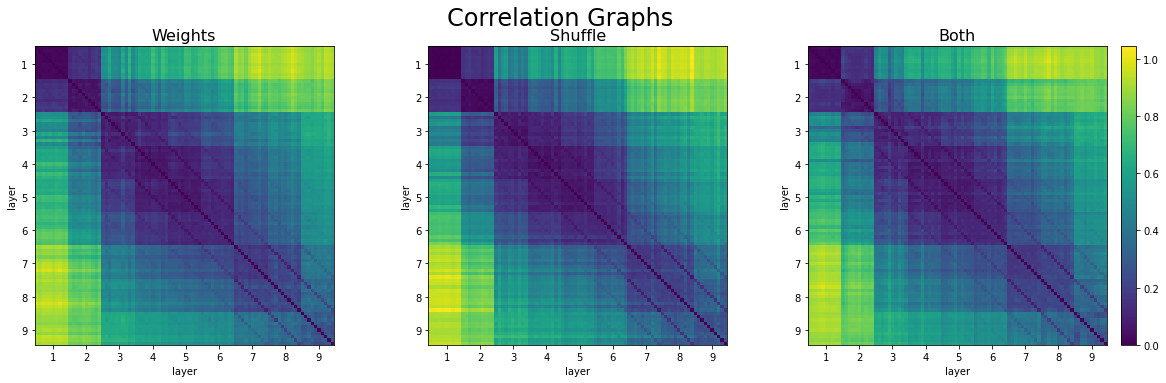

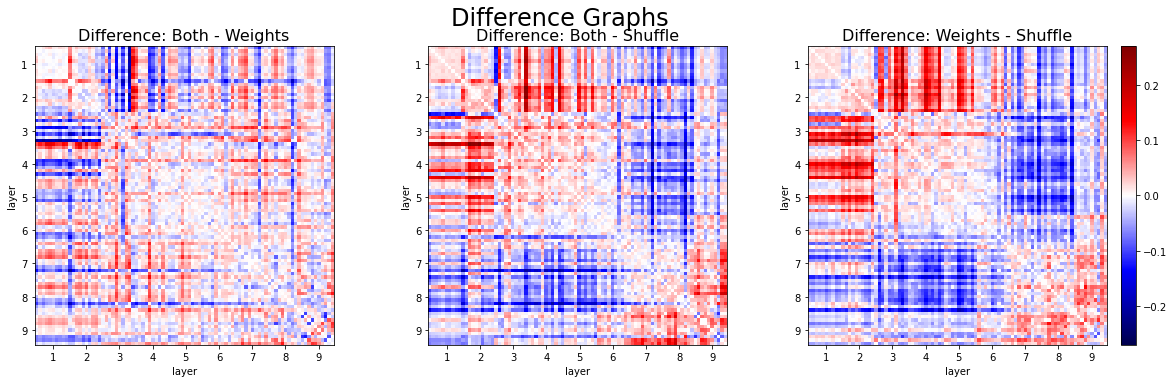

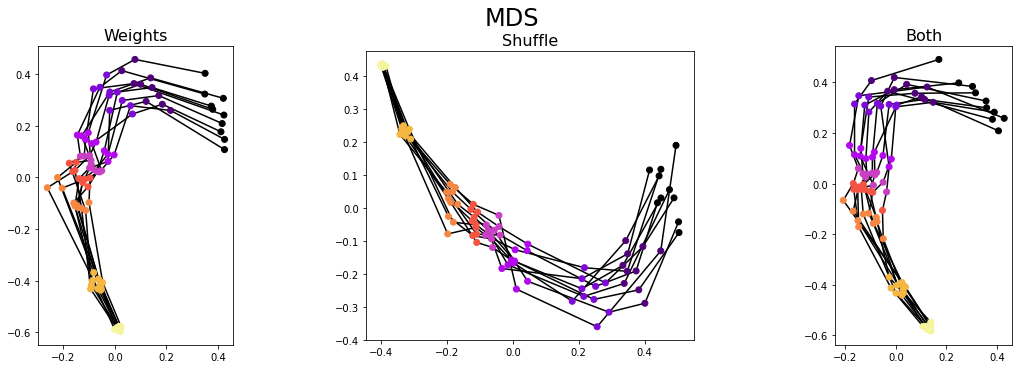

In [42]:
'''
Visualize RSA
'''
plot_triple_color(weights=rsa_weights, shuffle=rsa_shuffle, both=rsa_both)
plot_triple_diff(weights=rsa_weights, shuffle=rsa_shuffle, both=rsa_both)
plot_triple_mds(weights=rsa_weights, shuffle=rsa_shuffle, both=rsa_both)

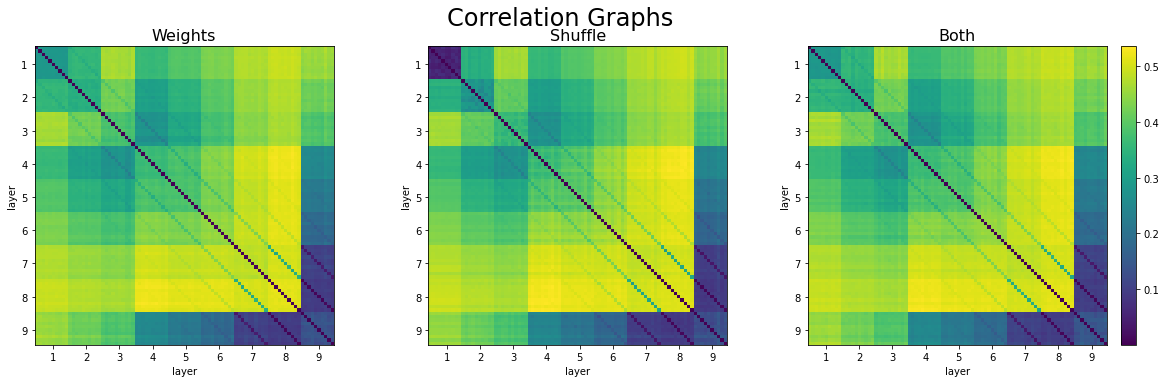

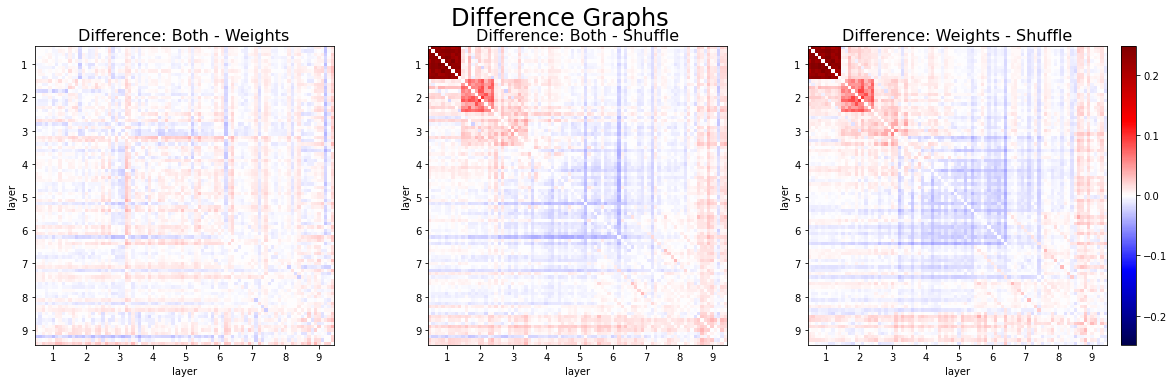

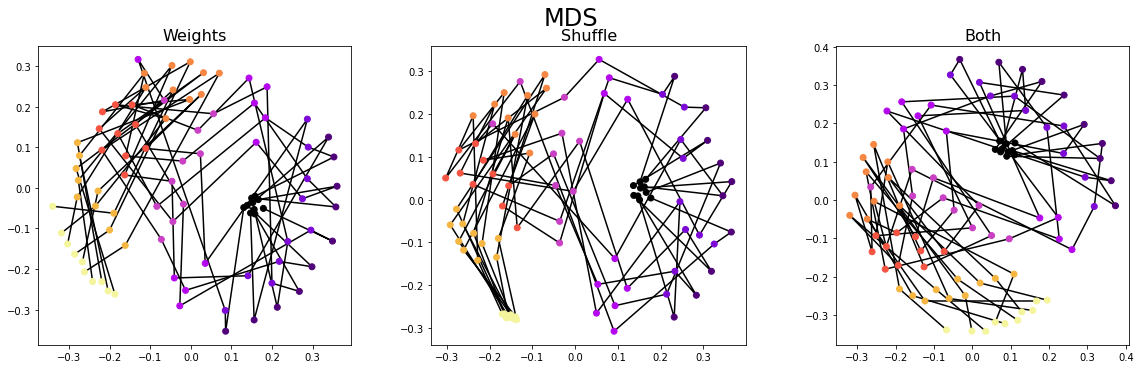

In [43]:
'''
Visualize SVCCA
'''
plot_triple_color(weights=svcca_weights, shuffle=svcca_shuffle, both=svcca_both)
plot_triple_diff(weights=svcca_weights, shuffle=svcca_shuffle, both=svcca_both)
plot_triple_mds(weights=svcca_weights, shuffle=svcca_shuffle, both=svcca_both)

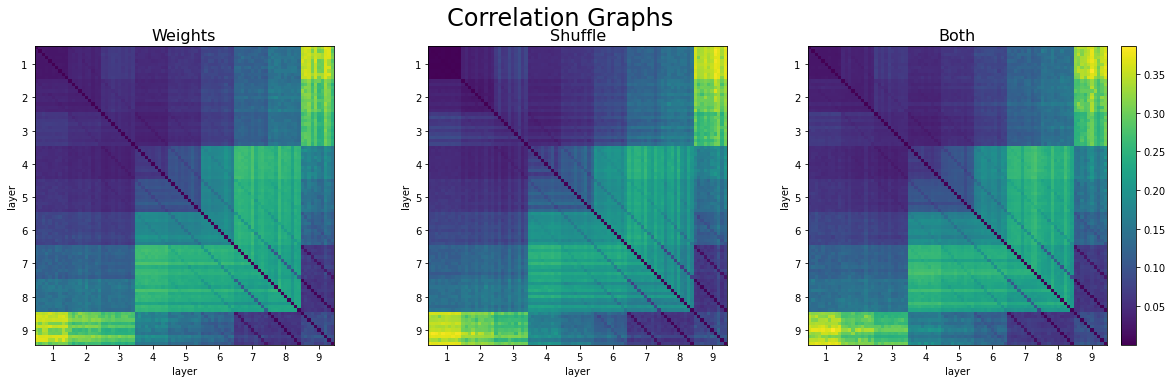

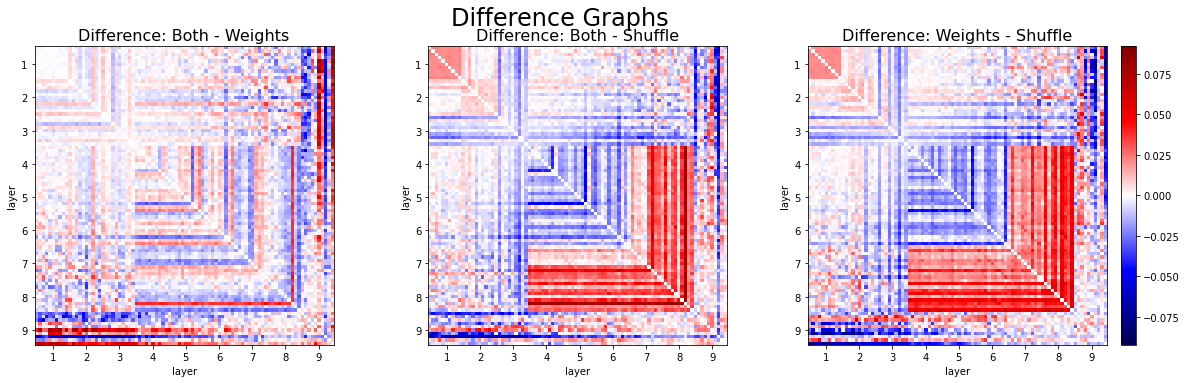

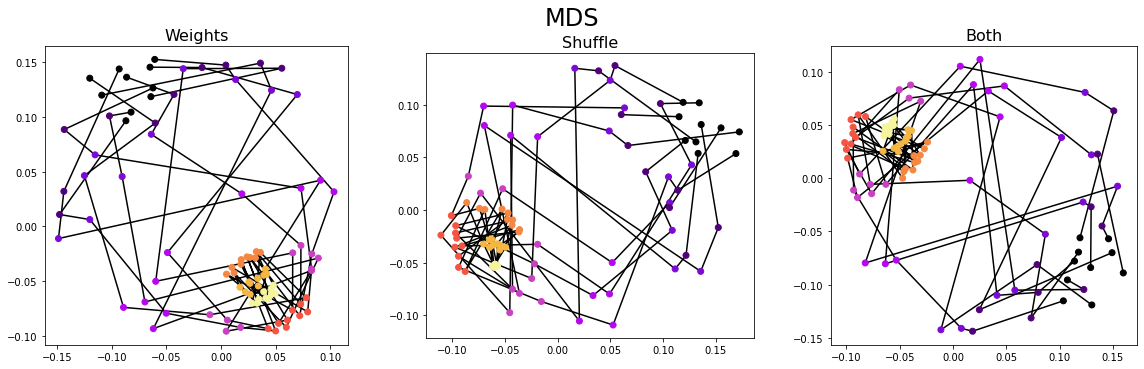

In [44]:
'''
Visualize PWCCA
'''
plot_triple_color(weights=pwcca_weights, shuffle=pwcca_shuffle, both=pwcca_both)
plot_triple_diff(weights=pwcca_weights, shuffle=pwcca_shuffle, both=pwcca_both)
plot_triple_mds(weights=pwcca_weights, shuffle=pwcca_shuffle, both=pwcca_both)

In [9]:
'''
Visualize Transfrom Baseline
'''

color_rsa_weights = baseline.transform_baseline(x_predict, 'color', 
                                       load_model('../outputs/models/primary/instance_200.h5'),
                                       7, analysis.do_rsa)

### Transform: color with do_rsa
 - Working on version 0 of 201
 - Now correlating...
correlation: 0.23913300431509568
 - Working on version 1 of 201
 - Now correlating...
correlation: 0.23931251451616414
 - Working on version 2 of 201
 - Now correlating...
correlation: 0.23948889841570284
 - Working on version 3 of 201
 - Now correlating...
correlation: 0.23968544303099737
 - Working on version 4 of 201
 - Now correlating...
correlation: 0.2398418176616428
 - Working on version 5 of 201
 - Now correlating...
correlation: 0.23995322286726917
 - Working on version 6 of 201
 - Now correlating...
correlation: 0.24011745982869434
 - Working on version 7 of 201
 - Now correlating...
correlation: 0.24045542830324787
 - Working on version 8 of 201
 - Now correlating...
correlation: 0.24058463253167844
 - Working on version 9 of 201
 - Now correlating...
correlation: 0.2407654614785865
 - Working on version 10 of 201
 - Now correlating...
correlation: 0.2409011030694957
 - Working on version 1

 - Now correlating...
correlation: 0.24703539778688083
 - Working on version 95 of 201
 - Now correlating...
correlation: 0.24709470951363213
 - Working on version 96 of 201
 - Now correlating...
correlation: 0.2470518147754372
 - Working on version 97 of 201
 - Now correlating...
correlation: 0.24721693659091193
 - Working on version 98 of 201
 - Now correlating...
correlation: 0.24720062337038998
 - Working on version 99 of 201
 - Now correlating...
correlation: 0.24715751452481396
 - Working on version 100 of 201
 - Now correlating...
correlation: 0.24713889282443777
 - Working on version 101 of 201
 - Now correlating...
correlation: 0.24710292160253106
 - Working on version 102 of 201
 - Now correlating...
correlation: 0.247209491267949
 - Working on version 103 of 201
 - Now correlating...
correlation: 0.2472666305989212
 - Working on version 104 of 201
 - Now correlating...
correlation: 0.24724494181360435
 - Working on version 105 of 201
 - Now correlating...
correlation: 0.2471

 - Now correlating...
correlation: 0.24478387822497108
 - Working on version 189 of 201
 - Now correlating...
correlation: 0.24463627647248923
 - Working on version 190 of 201
 - Now correlating...
correlation: 0.2445811350211949
 - Working on version 191 of 201
 - Now correlating...
correlation: 0.2445941645409088
 - Working on version 192 of 201
 - Now correlating...
correlation: 0.2445873949392493
 - Working on version 193 of 201
 - Now correlating...
correlation: 0.24455901199439628
 - Working on version 194 of 201
 - Now correlating...
correlation: 0.24446633392917186
 - Working on version 195 of 201
 - Now correlating...
correlation: 0.24444323589629552
 - Working on version 196 of 201
 - Now correlating...
correlation: 0.24434248468126515
 - Working on version 197 of 201
 - Now correlating...
correlation: 0.24427841539837258
 - Working on version 198 of 201
 - Now correlating...
correlation: 0.24436756029540485
 - Working on version 199 of 201
 - Now correlating...
correlation: 

In [18]:
'''
Save weights
'''
# np.save('pwcca_weights.npy', pwcca_weights)
# np.save('pwcca_shuffle.npy', pwcca_shuffle)
# np.save('svcca_weights.npy', svcca_weights)
# np.save('svcca_shuffle.npy', svcca_shuffle)
# np.save('rsa_weights.npy', rsa_weights)
# np.save('rsa_shuffle.npy', rsa_shuffle)
# np.save('rsa_both.npy', rsa_both)
# np.save('pwcca_both.npy', pwcca_both)
# np.save('svcca_both.npy', svcca_both)
pwcca_weights = np.load('pwcca_weights.npy')
svcca_weights = np.load('svcca_weights.npy')
rsa_weights = np.load('rsa_weights.npy')
pwcca_shuffle = np.load('pwcca_shuffle.npy')
svcca_shuffle = np.load('svcca_shuffle.npy')
rsa_shuffle = np.load('rsa_shuffle.npy')
pwcca_both = np.load('pwcca_both.npy')
svcca_both = np.load('svcca_both.npy')
rsa_both = np.load('rsa_both.npy')


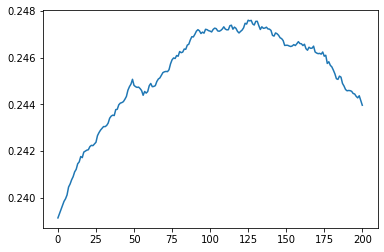

In [10]:
plt.plot(color_rsa_weights)